# 시계열 예측 

In [67]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from statsmodels.tsa.stattools import adfuller # 정상성 ADF테스트

from statsmodels.tsa.arima.model import ARIMA # ARIMA 모델
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf # ARIMA의 파라미터를 시각화하는 플롯 
# p,q 값을 넣기위해 plot먼저 생성. # 파라미터랑 다르게 필수값으로 지정해야할 값이 있음. # plot으로 예측해야함

In [68]:
# CSV 파일 읽기
df = pd.read_csv('춘천시_시계열데이터.csv', encoding='cp949')

# 필요한 열만 선택
df_selected = df[['기준년월', '워케이션 언급량']]

df_selected

,기준년월,워케이션 언급량
0,2021-01-01,NaN
1,2021-02-01,2.0
2,2021-03-01,3.0
3,2021-04-01,5.0
4,2021-05-01,8.0
5,2021-06-01,4.0
6,2021-07-01,NaN
7,2021-08-01,29.0
8,2021-09-01,43.0
9,2021-10-01,28.0


In [69]:
# '워케이션 언급량' 열의 NaN 값을 0으로 대체
df_selected['워케이션 언급량'] = df_selected['워케이션 언급량'].fillna(0)
df_selected

,기준년월,워케이션 언급량
0,2021-01-01,0.0
1,2021-02-01,2.0
2,2021-03-01,3.0
3,2021-04-01,5.0
4,2021-05-01,8.0
5,2021-06-01,4.0
6,2021-07-01,0.0
7,2021-08-01,29.0
8,2021-09-01,43.0
9,2021-10-01,28.0


In [70]:
df_selected.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44 entries, 0 to 43
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   기준년월      44 non-null     object 
 1   워케이션 언급량  44 non-null     float64
dtypes: float64(1), object(1)
memory usage: 832.0+ bytes


In [71]:
df_selected.describe()

,워케이션 언급량
count,44.000000
mean,56.659091
std,48.473893
min,0.000000
25%,18.750000
50%,47.000000
75%,82.500000
max,205.000000


Text(0, 0.5, '워케이션 언급량')

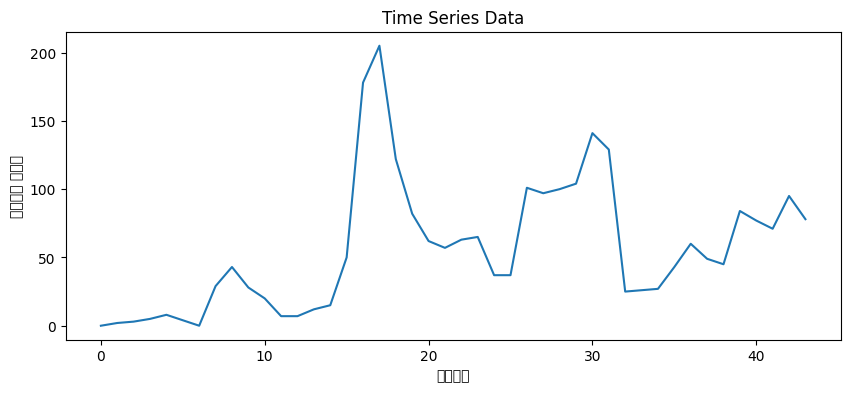

In [72]:
# 시계열 데이터를 시각화 해보기
plt.figure(figsize=(10,4)) # 그래프 크기 설정
plt.plot(df_selected['워케이션 언급량']) # 데이터 플롯팅
plt.title('Time Series Data') # 제목 설정
plt.xlabel('기준년월') # x축 레이블 설정
plt.ylabel('워케이션 언급량') # y축 레이블 설정

In [73]:
# ADF 테스트
result = adfuller(df_selected['워케이션 언급량'])
#print("ADF Test Statistic:", result[0])
print("p-value:", result[1])
#print("Critical Values:", result[4])

p-value: 0.009503956371723523


귀무가설 기각 - 정상성

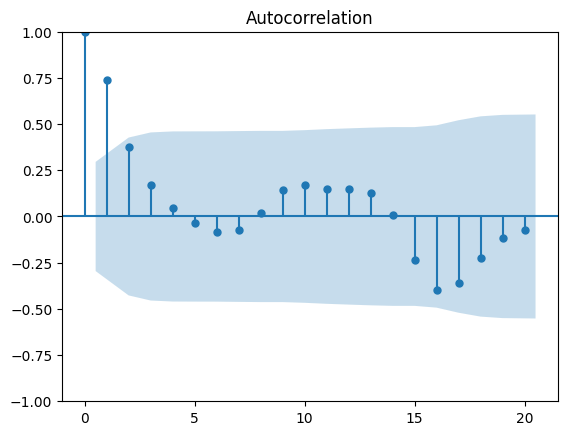

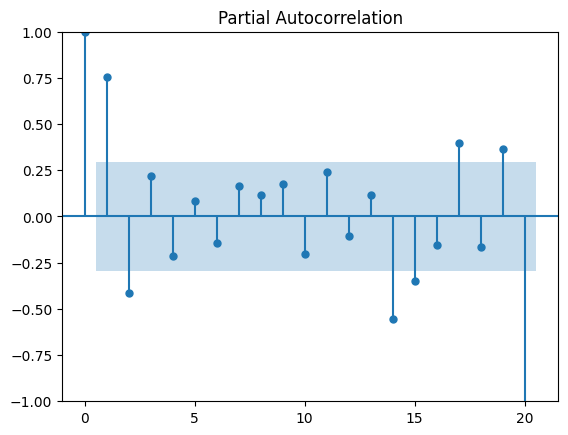

In [74]:
# ACF 및 PACF 플롯
plot_acf(df_selected['워케이션 언급량'].dropna(), lags=20)
plt.show()

plot_pacf(df_selected['워케이션 언급량'].dropna(), lags=20)
plt.show()

- ACF -> q =1 , PACF -> p = 2

## ARIMA

In [75]:
df_selected['기준년월'] = pd.to_datetime(df_selected['기준년월'])

In [76]:
# ARIMA 모델 학습
order = (2, 0, 1)  # (p, d, q)
#                 pacf, d, acf
model = ARIMA(df_selected['워케이션 언급량'], order = order) # 학습시킬 타깃열을 넣어주면됨.  # 원본을 넣은이유는 d값을 넣었기 때문에.
fitted_model = model.fit()

# 모델 요약
print(fitted_model.summary())

                               SARIMAX Results                                
Dep. Variable:               워케이션 언급량   No. Observations:                   44
Model:                 ARIMA(2, 0, 1)   Log Likelihood                -208.915
Date:                Tue, 18 Feb 2025   AIC                            427.830
Time:                        17:31:05   BIC                            436.751
Sample:                             0   HQIC                           431.139
                                 - 44                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         55.3283     23.279      2.377      0.017       9.703     100.954
ar.L1          0.2352      0.261      0.900      0.368      -0.277       0.747
ar.L2          0.2666      0.229      1.162      0.2

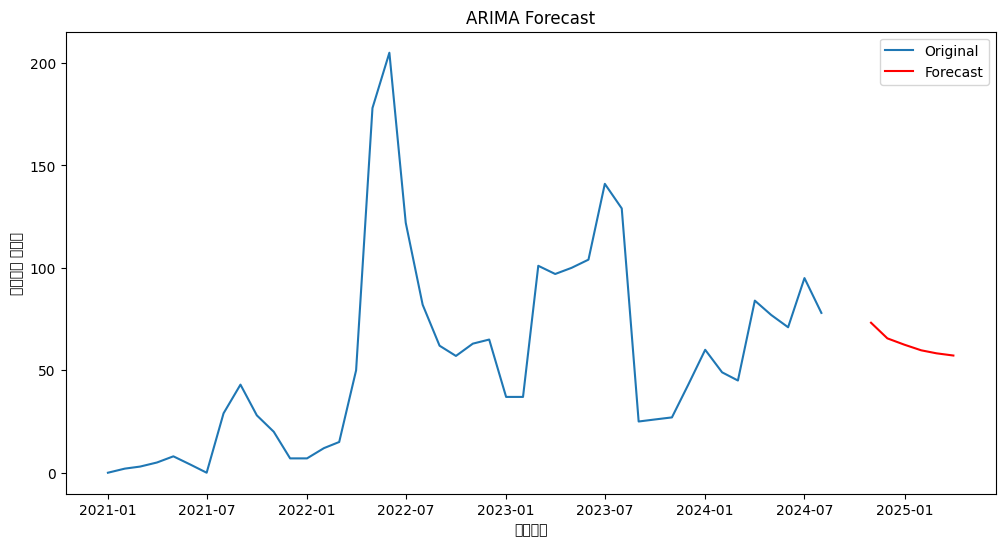

In [77]:
forecast_steps = 6  # 30일 예측
forecast = fitted_model.forecast(steps=forecast_steps)
forecast_dates = pd.date_range(start=df_selected['기준년월'].iloc[-1]+ pd.DateOffset(months=1), periods=forecast_steps + 1, freq='M')[1:]

# 예측 시각화
plt.figure(figsize=(12, 6))
plt.plot(df_selected['기준년월'], df_selected['워케이션 언급량'], label='Original')
plt.plot(forecast_dates, forecast, label='Forecast', color='red')
plt.title('ARIMA Forecast')
plt.xlabel('기준년월')
plt.ylabel('워케이션 언급량')
plt.legend()
plt.show()

In [78]:
forecast

44    73.210450
45    65.577601
46    62.505835
47    59.748583
48    58.281278
49    57.201155
Name: predicted_mean, dtype: float64

In [79]:
# MAPE 계산 함수
def calculate_mape(actual, predicted):
    actual, predicted = np.array(actual), np.array(predicted)
    return np.mean(np.abs((actual - predicted) / actual)) * 100

# MAPE 계산 (30일 예측 결과와 마지막 실제 값 비교)
# 실제 값이 존재하는지 확인하고 추출
actual =  df_selected['워케이션 언급량'][-6:] # 똑같이 30일 실제값과 비교해야함. 꼭 마지막 30일과 비교해야되는건 아님. -30아니어도됨.

if len(actual) == len(forecast):
    mape = calculate_mape(actual, forecast)
else:
    mape = None  # 실제 값과 예측 값이 비교할 수 없을 경우

# MAPE 값 출력
mape # 절대오차를 % 로 표시해놓음.

30.76807430337583

In [80]:
# RMSE
# 실제 값 추출 (마지막 30일)
actual_values = df_selected['워케이션 언급량'].iloc[-forecast_steps:].values
from sklearn.metrics import mean_squared_error

# MSE 계산
mse = mean_squared_error(actual_values, forecast)
rmse = np.sqrt(mse)
print(f'Mean Squared Error: {mse:.2f}')
print(f'Root Mean Squared Error: {rmse:.2f}')

Mean Squared Error: 542.12
Root Mean Squared Error: 23.28


최적 파라미터 (p,d,q): (1, 1, 3)

=== 모델 성능 ===
RMSE: 25.52
MAPE: 33.00%


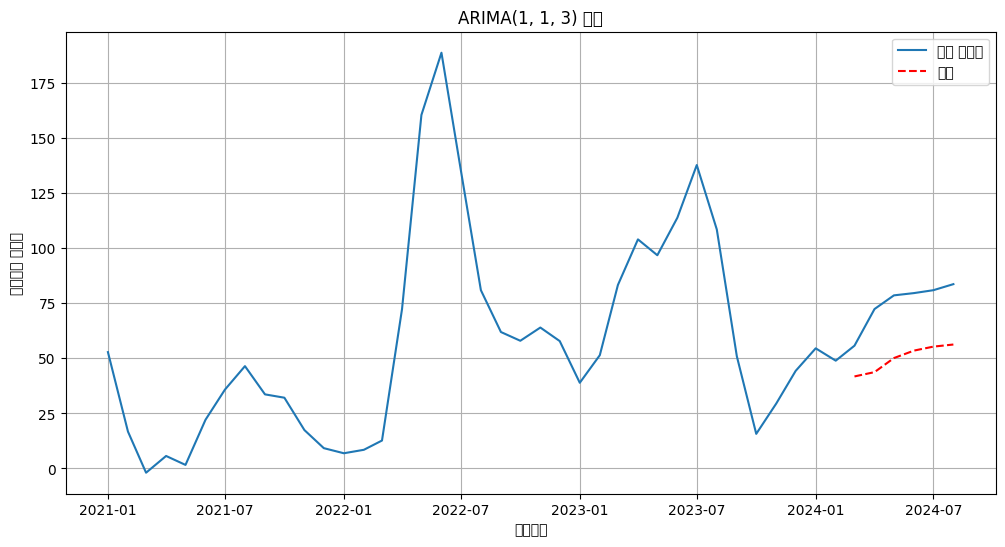

In [81]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error
from scipy.signal import savgol_filter

# 데이터 전처리 개선
def preprocess_data(df):
    # 이상치 처리
    def handle_outliers(series, n_sigmas=3):
        mean = series.mean()
        std = series.std()
        upper_limit = mean + n_sigmas * std
        lower_limit = mean - n_sigmas * std
        return series.clip(lower=lower_limit, upper=upper_limit)
    
    # 스무딩 적용
    def apply_smoothing(series, window=5, poly=2):
        return savgol_filter(series, window_length=window, polyorder=poly)
    
    df_processed = df.copy()
    df_processed['워케이션 언급량'] = df_processed['워케이션 언급량'].fillna(
        df_processed['워케이션 언급량'].mean())  # 평균값으로 대체
    df_processed['워케이션 언급량'] = handle_outliers(df_processed['워케이션 언급량'])
    df_processed['워케이션 언급량'] = apply_smoothing(df_processed['워케이션 언급량'])
    
    return df_processed

# Grid Search 함수
def grid_search_arima(data, p_range, d_range, q_range):
    best_aic = float('inf')
    best_params = None
    best_model = None
    
    for p in p_range:
        for d in d_range:
            for q in q_range:
                try:
                    model = ARIMA(data, order=(p,d,q))
                    results = model.fit()
                    if results.aic < best_aic:
                        best_aic = results.aic
                        best_params = (p,d,q)
                        best_model = results
                except:
                    continue
    return best_params, best_model

# 데이터 읽기
df = pd.read_csv('춘천시_시계열데이터.csv', encoding='cp949')
df_selected = df[['기준년월', '워케이션 언급량']]
df_selected['기준년월'] = pd.to_datetime(df_selected['기준년월'])

# 전처리 적용
df_processed = preprocess_data(df_selected)

# 훈련/테스트 분할
train_size = len(df_processed) - 6
train = df_processed[:train_size]
test = df_processed[train_size:]

# Grid Search로 최적 파라미터 찾기
p_range = range(0, 4)
d_range = range(0, 2)
q_range = range(0, 4)

best_params, best_model = grid_search_arima(
    train['워케이션 언급량'],
    p_range, d_range, q_range
)

print(f"최적 파라미터 (p,d,q): {best_params}")

# 예측
forecast = best_model.forecast(steps=len(test))
forecast_dates = test['기준년월']

# 성능 평가
rmse = np.sqrt(mean_squared_error(test['워케이션 언급량'], forecast))
mape = mean_absolute_percentage_error(test['워케이션 언급량'], forecast) * 100

print(f"\n=== 모델 성능 ===")
print(f"RMSE: {rmse:.2f}")
print(f"MAPE: {mape:.2f}%")

# 시각화
plt.figure(figsize=(12, 6))
plt.plot(df_processed['기준년월'], df_processed['워케이션 언급량'], 
         label='실제 데이터')
plt.plot(forecast_dates, forecast, 
         label='예측', linestyle='--', color='red')
plt.title(f'ARIMA{best_params} 예측')
plt.xlabel('기준년월')
plt.ylabel('워케이션 언급량')
plt.legend()
plt.grid(True)
plt.show()

## SARIMA

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose

# 시계열 분해
decomp = seasonal_decompose(df_selected['워케이션 언급량'],model='additive', period=12) # period = 주기
# 분해 결과 시각화
decomp.plot()
plt.show()

In [83]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [84]:
seasonal_order = (1, 0, 1, 12 )  # 70 외의 숫자로 교차검증해봐야함.
#                 P, D, Q, s
#         계절적 자기회귀, 계절적 차분, 계절적 이동평균, 주기

In [85]:
# SARIMAX 모델 학습
sarima_model = SARIMAX(df_selected['워케이션 언급량'], order=(1, 0, 1), seasonal_order=seasonal_order)
fitted_sarima_model = sarima_model.fit()

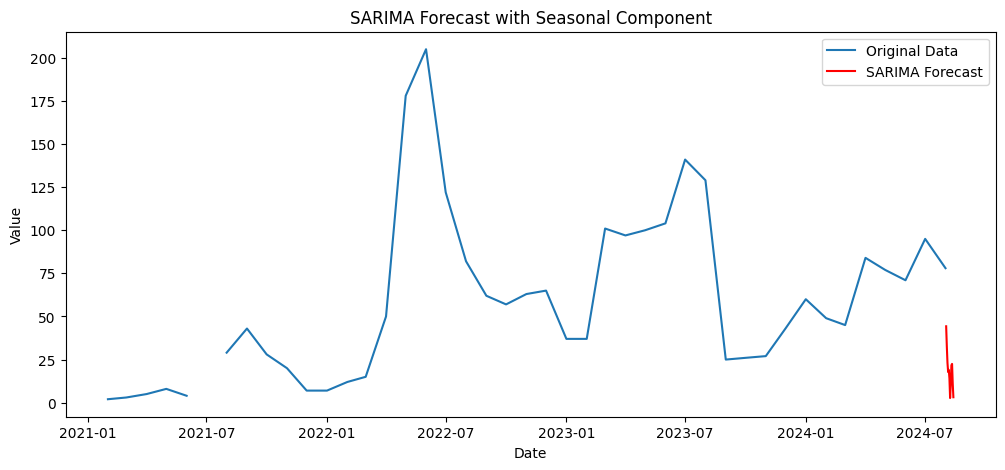

In [86]:
step = 12
forecast_sarima = fitted_sarima_model.forecast(steps=step)
forecast_dates_sarima = pd.date_range(start=df_selected['기준년월'].iloc[-1], periods=step + 1, freq='D')[1:]

plt.figure(figsize=(12, 5))
plt.plot(df_selected['기준년월'], df_selected['워케이션 언급량'], label='Original Data')
plt.plot(forecast_dates_sarima, forecast_sarima, label='SARIMA Forecast', color='red')
plt.title('SARIMA Forecast with Seasonal Component')
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend()
plt.show()

# 가중치 부여

- 성능개선위해 가중치 부여해 새로운 열 생성 -> 군집0의 특성을 반영해 워케이션 잠재력 계산

## 춘천시

### arima

ADF Statistic: -3.059324486806885
p-value: 0.0297134990356484
Critical values: {'1%': -3.596635636000432, '5%': -2.933297331821618, '10%': -2.6049909750566895}


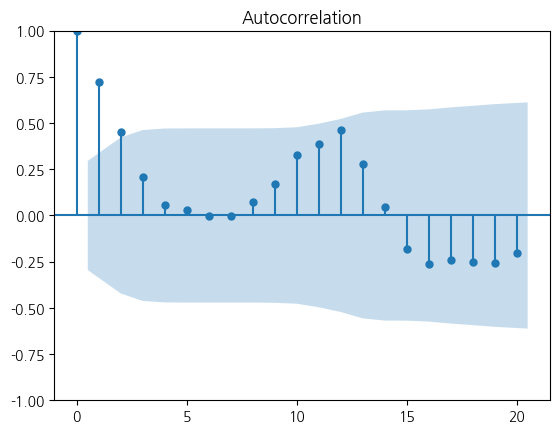

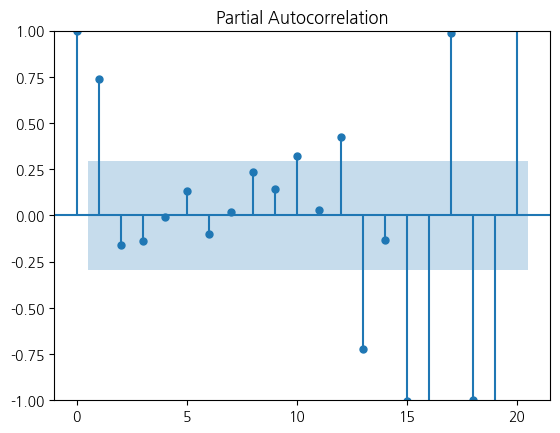

                                   SARIMAX Results                                    
Dep. Variable:     workation_potential_scaled   No. Observations:                   44
Model:                         ARIMA(2, 0, 3)   Log Likelihood                  15.402
Date:                        Tue, 18 Feb 2025   AIC                            -16.805
Time:                                15:25:33   BIC                             -4.315
Sample:                                     0   HQIC                           -12.173
                                         - 44                                         
Covariance Type:                          opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.5478      0.083      6.638      0.000       0.386       0.710
ar.L1          0.1327      1.210      0.110      0.913      -2.240 

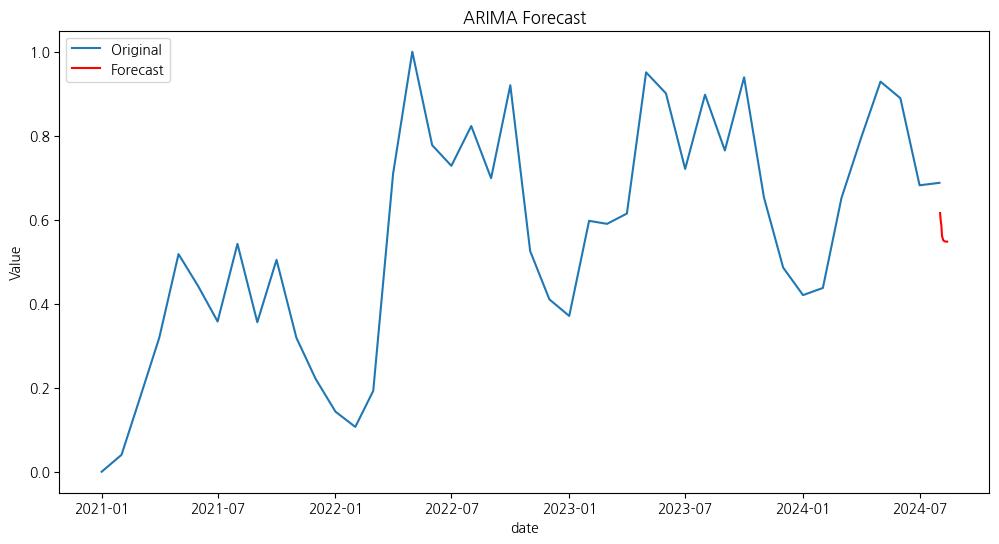

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.stattools import adfuller
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
import warnings
warnings.filterwarnings('ignore')
from statsmodels.tsa.arima.model import ARIMA # ARIMA 모델

# CSV 파일 읽기
df = pd.read_csv('춘천시_시계열데이터.csv', encoding='cp949')

# 가중치 설정
weights = {
    '장기숙박비율': 0.90, 
    '관광소비액(천원)': 0.90,     
    '배우자': 0.80,      
    '부모님': 0.80,      
    '자녀': 0.80,         
    '역사관광': 0.70,   
    '문화관광': 0.70        
}
from sklearn.preprocessing import MinMaxScaler

# 워케이션 잠재력 계산
df['workation_potential'] = (
    df['문화관광'] * weights['문화관광'] +
    df['역사관광'] * weights['역사관광'] +
    df['관광소비액(천원)'] * weights['관광소비액(천원)'] +
    df['장기숙박비율'] * weights['장기숙박비율']
) * (
    (df['배우자'] * weights['배우자'] +
     df['자녀'] * weights['자녀'] +
     df['부모님'] * weights['부모님']) / 3
)

# 워케이션 잠재력 스케일링
scaler = MinMaxScaler()
df['workation_potential_scaled'] = scaler.fit_transform(df[['workation_potential']])

# 시계열 데이터 준비
df['date'] = pd.to_datetime(df['기준년월'])
df = df.sort_values('date')
time_series = df['workation_potential_scaled']


# 정상성 검정
adf_result = adfuller(time_series)
print('ADF Statistic:', adf_result[0])
print('p-value:', adf_result[1])
print('Critical values:', adf_result[4])

# ACF 및 PACF 플롯
plot_acf(time_series, lags=20)
plt.show()

plot_pacf(time_series, lags=20)
plt.show()


# ARIMA 모델 학습
order = (2, 0, 3)  # (p, d, q)
#                 pacf, d, acf
model = ARIMA(time_series, order = order) # 학습시킬 타깃열을 넣어주면됨.  # 원본을 넣은이유는 d값을 넣었기 때문에.
fitted_model = model.fit()

# 모델 요약
print(fitted_model.summary())

forecast_steps = 12  # 30일 예측
forecast = fitted_model.forecast(steps=forecast_steps)
forecast_dates = pd.date_range(start=df['date'].iloc[-1], periods=forecast_steps + 1, freq='D')[1:]

# 예측 시각화
plt.figure(figsize=(12, 6))
plt.plot(df['date'], time_series , label='Original')
plt.plot(forecast_dates, forecast, label='Forecast', color='red')
plt.title('ARIMA Forecast')
plt.xlabel('date')
plt.ylabel('Value')
plt.legend()
plt.show()


### sarima

ADF Statistic: -3.059324486806885
p-value: 0.0297134990356484
Critical values: {'1%': -3.596635636000432, '5%': -2.933297331821618, '10%': -2.6049909750566895}


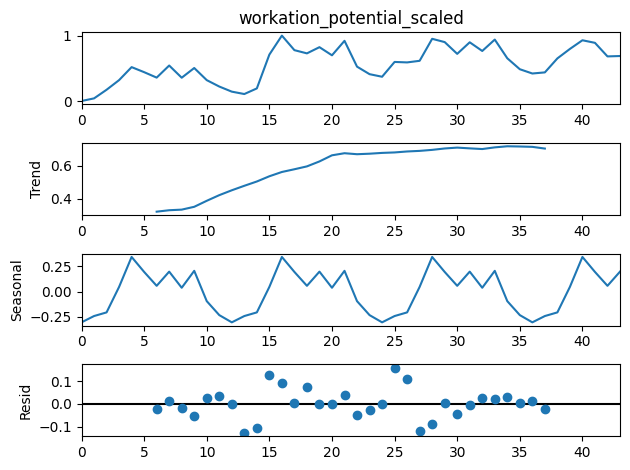


성능 평가 지표:
RMSE: 0.1653
MAE: 0.1366
MAPE: 22.22%


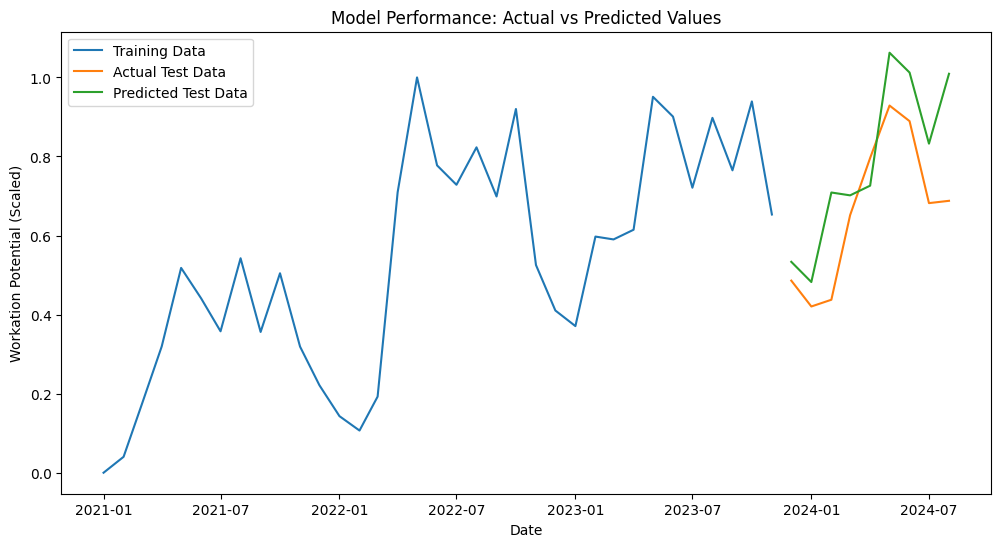

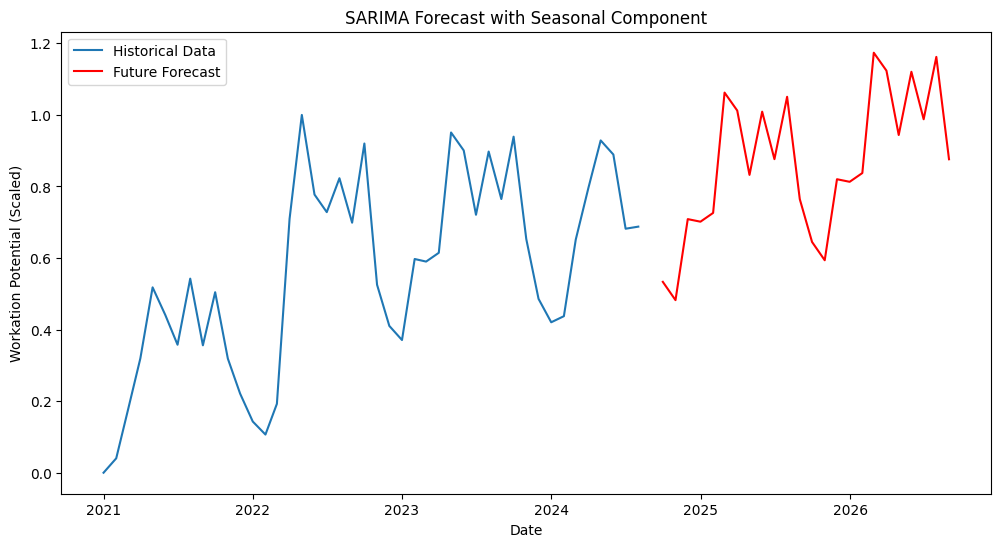


그래프 해석:
1. 전반적인 추세: 워케이션 잠재력은 increasing 추세를 보입니다.
2. 계절성: 데이터에서 계절성은 present합니다.
3. 변동성: 예측된 future 기간의 변동성은 과거 데이터에 비해 lower합니다.
4. 최고점: 1.2034로 예상되며, 이는 2025-02-28에 발생할 것으로 예측됩니다.
5. 최저점: 0.7652로 예상되며, 이는 2025-08-31에 발생할 것으로 예측됩니다.
6. 권장사항: 워케이션 프로그램 및 마케팅 전략을 최고점 시기에 맞춰 집중적으로 진행하는 것이 효과적일 수 있습니다.


In [4]:
import pandas as pd
import numpy as np
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from itertools import product
import warnings
warnings.filterwarnings('ignore')
from sklearn.metrics import mean_squared_error, mean_absolute_error

# CSV 파일 읽기
df = pd.read_csv('춘천시_시계열데이터.csv', encoding='cp949')

# 가중치 설정
weights = {
    '장기숙박비율': 0.90, 
    '관광소비액(천원)': 0.90,     
    '배우자': 0.80,      
    '부모님': 0.80,      
    '자녀': 0.80,         
    '역사관광': 0.70,   
    '문화관광': 0.70        
}

# 워케이션 잠재력 계산
df['workation_potential'] = (
    df['문화관광'] * weights['문화관광'] +
    df['역사관광'] * weights['역사관광'] +
    df['관광소비액(천원)'] * weights['관광소비액(천원)'] +
    df['장기숙박비율'] * weights['장기숙박비율']
) * (
    (df['배우자'] * weights['배우자'] +
     df['자녀'] * weights['자녀'] +
     df['부모님'] * weights['부모님']) / 3
)

# 워케이션 잠재력 스케일링
scaler = MinMaxScaler()
df['workation_potential_scaled'] = scaler.fit_transform(df[['workation_potential']])

# 시계열 데이터 준비
df['date'] = pd.to_datetime(df['기준년월'])
df = df.sort_values('date')
time_series = df['workation_potential_scaled']

# 정상성 검정
adf_result = adfuller(time_series)
print('ADF Statistic:', adf_result[0])
print('p-value:', adf_result[1])
print('Critical values:', adf_result[4])

# 시계열 분해
decomp = seasonal_decompose(time_series, model='additive', period=12)
decomp.plot()
plt.show()

# 데이터를 훈련 세트와 테스트 세트로 분할
train_size = int(len(time_series) * 0.8)
train_data = time_series[:train_size]
test_data = time_series[train_size:]

# SARIMAX 모델 설정 및 훈련
seasonal_order = (0, 1, 0, 12)
sarima_model = SARIMAX(train_data, order=(0, 1, 2), seasonal_order=seasonal_order)
fitted_sarima_model = sarima_model.fit()

# 테스트 세트에 대한 예측
test_forecast = fitted_sarima_model.forecast(steps=len(test_data))

# 성능 평가 지표 계산
rmse = np.sqrt(mean_squared_error(test_data, test_forecast))
mae = mean_absolute_error(test_data, test_forecast)
mape = np.mean(np.abs((test_data - test_forecast) / test_data)) * 100

print('\n성능 평가 지표:')
print(f'RMSE: {rmse:.4f}')
print(f'MAE: {mae:.4f}')
print(f'MAPE: {mape:.2f}%')

# 실제값과 예측값 비교 시각화
plt.figure(figsize=(12, 6))
plt.plot(df['date'][:train_size], train_data, label='Training Data')
plt.plot(df['date'][train_size:], test_data, label='Actual Test Data')
plt.plot(df['date'][train_size:], test_forecast, label='Predicted Test Data')
plt.title('Model Performance: Actual vs Predicted Values')
plt.xlabel('Date')
plt.ylabel('Workation Potential (Scaled)')
plt.legend()
plt.show()

# 미래 예측
step = 24
last_date = df['date'].iloc[-1]
forecast_dates_sarima = pd.date_range(start=last_date, periods=step+1, freq='M')[1:]
forecast_sarima = fitted_sarima_model.forecast(steps=step)

# 미래 예측 시각화
plt.figure(figsize=(12, 6))
plt.plot(df['date'], time_series, label='Historical Data')
plt.plot(forecast_dates_sarima, forecast_sarima, label='Future Forecast', color='red')
plt.title('SARIMA Forecast with Seasonal Component')
plt.xlabel('Date')
plt.ylabel('Workation Potential (Scaled)')
plt.legend()
plt.show()


# 그래프 해석 함수
def interpret_graph(historical_data, forecast_data, forecast_dates):
    if len(historical_data) == 0 or len(forecast_data) == 0:
        print("Error: Historical data or forecast data is empty.")
        return

    # 전반적인 추세 분석
    overall_trend = 'increasing' if forecast_data.iloc[-1] > historical_data.iloc[-1] else 'decreasing'
    
    # 계절성 확인
    seasonality = 'present' if seasonal_order[3] > 1 else 'not clearly present'
    
    # 예측의 변동성 분석
    forecast_volatility = forecast_data.std()
    historical_volatility = historical_data.iloc[-12:].std()  # 마지막 12개월의 변동성
    volatility_comparison = 'higher' if forecast_volatility > historical_volatility else 'lower'
    
    # 최고점과 최저점 찾기
    peak = forecast_data.max()
    trough = forecast_data.min()
    peak_date = forecast_dates[forecast_data.argmax()]
    trough_date = forecast_dates[forecast_data.argmin()]
    
    # 해석 출력
    print("\n그래프 해석:")
    print(f"1. 전반적인 추세: 워케이션 잠재력은 {overall_trend} 추세를 보입니다.")
    print(f"2. 계절성: 데이터에서 계절성은 {seasonality}합니다.")
    print(f"3. 변동성: 예측된 future 기간의 변동성은 과거 데이터에 비해 {volatility_comparison}합니다.")
    print(f"4. 최고점: {peak:.4f}로 예상되며, 이는 {peak_date.strftime('%Y-%m-%d')}에 발생할 것으로 예측됩니다.")
    print(f"5. 최저점: {trough:.4f}로 예상되며, 이는 {trough_date.strftime('%Y-%m-%d')}에 발생할 것으로 예측됩니다.")
    print("6. 권장사항: 워케이션 프로그램 및 마케팅 전략을 최고점 시기에 맞춰 집중적으로 진행하는 것이 효과적일 수 있습니다.")

# 그래프 해석 함수 호출
interpret_graph(time_series, forecast_sarima_original, forecast_dates_sarima)

### 추가성능지표

ADF Statistic: -3.059324486806885
p-value: 0.0297134990356484
Critical values: {'1%': -3.596635636000432, '5%': -2.933297331821618, '10%': -2.6049909750566895}


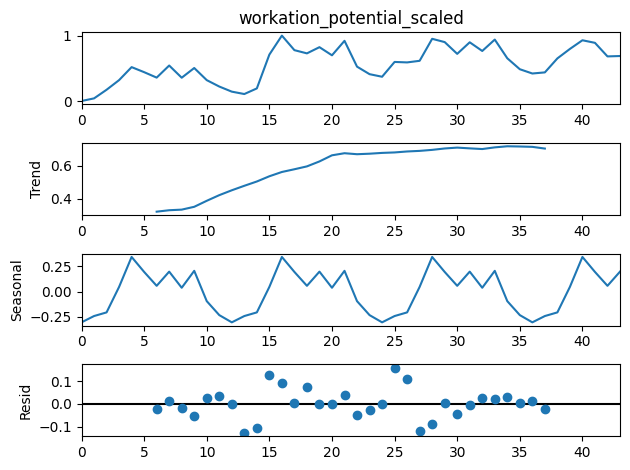


성능 평가 지표:
RMSE: 0.1653
MAE: 0.1366
MAPE: 22.22%


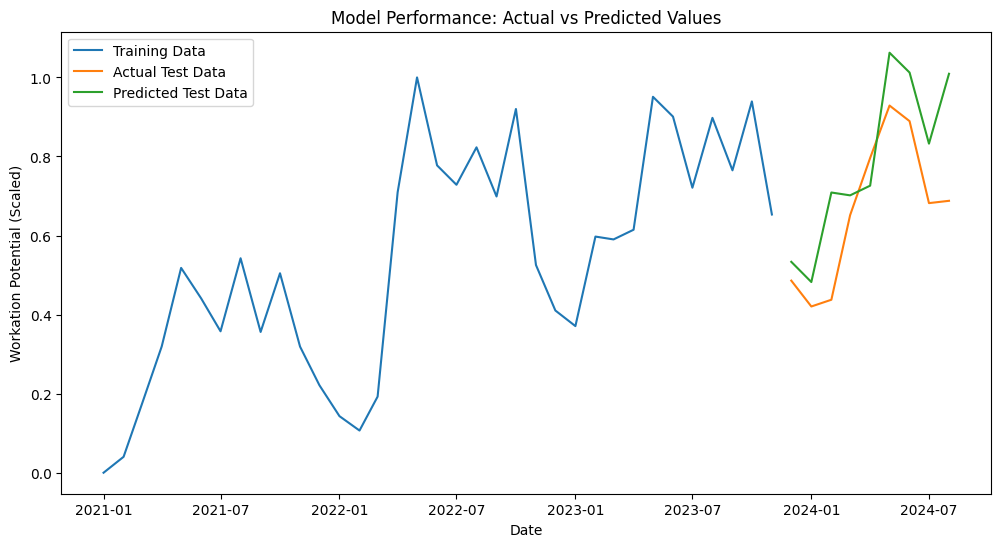

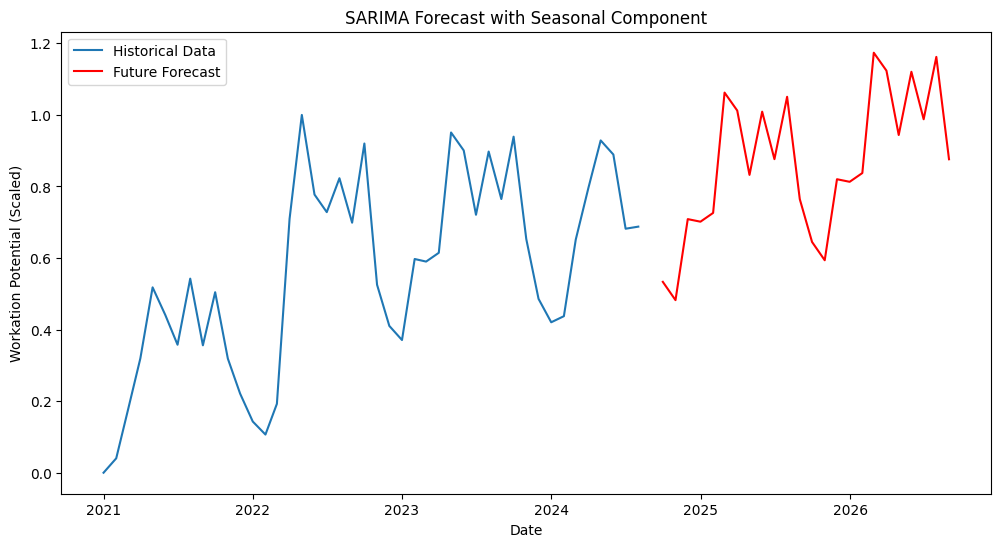


확장된 성능 평가 지표:
R-squared: 0.1268
Adjusted R-squared: -0.3972
Theil's U Statistic: 0.1104
Directional Accuracy: 87.50%

잔차 분석:
Jarque-Bera test p-value: 0.8895
Ljung-Box test p-value: 0.9531

예측 모델 성능 종합 평가:
1. 기본 오차 메트릭:
   - RMSE: 0.1653 (낮을수록 좋음)
   - MAE: 0.1366 (낮을수록 좋음)
   - MAPE: 22.22% (낮을수록 좋음)

2. 설명력 메트릭:
   - R-squared: 0.1268 (1에 가까울수록 좋음)
   - Adjusted R-squared: -0.3972 (1에 가까울수록 좋음)
   - Directional Accuracy: 87.50% (높을수록 좋음)

3. 예측 편향성:
   - Theil's U: 0.1104 (0에 가까울수록 좋음)

4. 잔차 분석:
   - 정규성 (Jarque-Bera test p-value): 0.8895
   - 자기상관 (Ljung-Box test p-value): 0.9531

5. 종합 평가:
   모델의 강점: 우수한 방향성 예측, 낮은 예측 편향, 정규분포 가정 충족, 자기상관 없음

그래프 해석:
1. 전반적인 추세: 워케이션 잠재력은 increasing 추세를 보입니다.
2. 계절성: 데이터에서 계절성은 present합니다.
3. 변동성: 예측된 future 기간의 변동성은 과거 데이터에 비해 lower합니다.
4. 최고점: 1.2034로 예상되며, 이는 2025-02-28에 발생할 것으로 예측됩니다.
5. 최저점: 0.7652로 예상되며, 이는 2025-08-31에 발생할 것으로 예측됩니다.
6. 권장사항: 워케이션 프로그램 및 마케팅 전략을 최고점 시기에 맞춰 집중적으로 진행하는 것이 효과적일 수 있습니다.


In [ ]:
import pandas as pd
import numpy as np
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from itertools import product
import warnings
warnings.filterwarnings('ignore')
from sklearn.metrics import mean_squared_error, mean_absolute_error
import seaborn as sns
from sklearn.metrics import r2_score
import scipy.stats as stats
from statsmodels.stats.diagnostic import acorr_ljungbox
from statsmodels.graphics.tsaplots import plot_acf
# CSV 파일 읽기
df = pd.read_csv('춘천시_시계열데이터.csv', encoding='cp949')

# 가중치 설정
weights = {
    '장기숙박비율': 0.90, 
    '관광소비액(천원)': 0.90,     
    '배우자': 0.80,      
    '부모님': 0.80,      
    '자녀': 0.80,         
    '역사관광': 0.70,   
    '문화관광': 0.70        
}

# 워케이션 잠재력 계산
df['workation_potential'] = (
    df['문화관광'] * weights['문화관광'] +
    df['역사관광'] * weights['역사관광'] +
    df['관광소비액(천원)'] * weights['관광소비액(천원)'] +
    df['장기숙박비율'] * weights['장기숙박비율']
) * (
    (df['배우자'] * weights['배우자'] +
     df['자녀'] * weights['자녀'] +
     df['부모님'] * weights['부모님']) / 3
)

# 워케이션 잠재력 스케일링
scaler = MinMaxScaler()
df['workation_potential_scaled'] = scaler.fit_transform(df[['workation_potential']])

# 시계열 데이터 준비
df['date'] = pd.to_datetime(df['기준년월'])
df = df.sort_values('date')
time_series = df['workation_potential_scaled']

# 정상성 검정
adf_result = adfuller(time_series)
print('ADF Statistic:', adf_result[0])
print('p-value:', adf_result[1])
print('Critical values:', adf_result[4])

# 시계열 분해
decomp = seasonal_decompose(time_series, model='additive', period=12)
decomp.plot()
plt.show()

# 데이터를 훈련 세트와 테스트 세트로 분할
train_size = int(len(time_series) * 0.8)
train_data = time_series[:train_size]
test_data = time_series[train_size:]

# SARIMAX 모델 설정 및 훈련
seasonal_order = (0, 1, 0, 12)
sarima_model = SARIMAX(train_data, order=(0, 1, 2), seasonal_order=seasonal_order)
fitted_sarima_model = sarima_model.fit()

# 테스트 세트에 대한 예측
test_forecast = fitted_sarima_model.forecast(steps=len(test_data))

# 성능 평가 지표 계산
rmse = np.sqrt(mean_squared_error(test_data, test_forecast))
mae = mean_absolute_error(test_data, test_forecast)
mape = np.mean(np.abs((test_data - test_forecast) / test_data)) * 100

print('\n성능 평가 지표:')
print(f'RMSE: {rmse:.4f}')
print(f'MAE: {mae:.4f}')
print(f'MAPE: {mape:.2f}%')

# 실제값과 예측값 비교 시각화
plt.figure(figsize=(12, 6))
plt.plot(df['date'][:train_size], train_data, label='Training Data')
plt.plot(df['date'][train_size:], test_data, label='Actual Test Data')
plt.plot(df['date'][train_size:], test_forecast, label='Predicted Test Data')
plt.title('Model Performance: Actual vs Predicted Values')
plt.xlabel('Date')
plt.ylabel('Workation Potential (Scaled)')
plt.legend()
plt.show()

# 미래 예측
step = 24
last_date = df['date'].iloc[-1]
forecast_dates_sarima = pd.date_range(start=last_date, periods=step+1, freq='M')[1:]
forecast_sarima = fitted_sarima_model.forecast(steps=step)

# 미래 예측 시각화
plt.figure(figsize=(12, 6))
plt.plot(df['date'], time_series, label='Historical Data')
plt.plot(forecast_dates_sarima, forecast_sarima, label='Future Forecast', color='red')
plt.title('SARIMA Forecast with Seasonal Component')
plt.xlabel('Date')
plt.ylabel('Workation Potential (Scaled)')
plt.legend()
plt.show()


# 추가적인 성능 메트릭 계산
# R-squared 계산
r2 = r2_score(test_data, test_forecast)
# Adjusted R-squared 계산
n = len(test_data)  # 샘플 수
p = 3  # 모델의 파라미터 수 (p,d,q)
adjusted_r2 = 1 - (1-r2)*(n-1)/(n-p-1)

# Theil's U 통계량 계산
def theil_u(y_true, y_pred):
    y_true = np.array(y_true)
    y_pred = np.array(y_pred)
    numerator = np.sqrt(np.mean((y_true - y_pred) ** 2))
    denominator = np.sqrt(np.mean(y_true ** 2)) + np.sqrt(np.mean(y_pred ** 2))
    return numerator / denominator

theil_u_stat = theil_u(test_data, test_forecast)

# 예측의 방향성 정확도 계산
def directional_accuracy(y_true, y_pred):
    y_true_direction = np.diff(y_true) > 0
    y_pred_direction = np.diff(y_pred) > 0
    return np.mean(y_true_direction == y_pred_direction) * 100

da = directional_accuracy(test_data, test_forecast)

# 잔차 분석
residuals = test_data- test_forecast

# Jarque-Bera 테스트로 잔차의 정규성 검정
jb_stat, jb_pvalue = stats.jarque_bera(residuals)

# Ljung-Box 테스트로 잔차의 자기상관 검정 (수정된 버전)
def perform_ljung_box_test(residuals):
    try:
        max_lag = min(10, len(residuals) // 5)
        if max_lag < 1:
            return None, None
        lb_result = acorr_ljungbox(residuals, lags=max_lag, return_df=True)
        return lb_result['lb_stat'].iloc[-1], lb_result['lb_pvalue'].iloc[-1]
    except Exception as e:
        print(f"Ljung-Box 테스트 수행 중 오류 발생: {str(e)}")
        return None, None

lb_stat, lb_pvalue = perform_ljung_box_test(residuals)

# 확장된 결과 출력
print('\n확장된 성능 평가 지표:')
print(f'R-squared: {r2:.4f}')
print(f'Adjusted R-squared: {adjusted_r2:.4f}')
print(f"Theil's U Statistic: {theil_u_stat:.4f}")
print(f'Directional Accuracy: {da:.2f}%')

print('\n잔차 분석:')
print(f'Jarque-Bera test p-value: {jb_pvalue:.4f}')
if lb_pvalue is not None:
    print(f'Ljung-Box test p-value: {lb_pvalue:.4f}')
else:
    print('Ljung-Box test: 수행할 수 없음 (데이터 길이 부족)')


# 5. 종합 평가 보고서
print('\n예측 모델 성능 종합 평가:')
print('1. 기본 오차 메트릭:')
print(f'   - RMSE: {rmse:.4f} (낮을수록 좋음)')
print(f'   - MAE: {mae:.4f} (낮을수록 좋음)')
print(f'   - MAPE: {mape:.2f}% (낮을수록 좋음)')

print('\n2. 설명력 메트릭:')
print(f'   - R-squared: {r2:.4f} (1에 가까울수록 좋음)')
print(f'   - Adjusted R-squared: {adjusted_r2:.4f} (1에 가까울수록 좋음)')
print(f'   - Directional Accuracy: {da:.2f}% (높을수록 좋음)')

print('\n3. 예측 편향성:')
print(f"   - Theil's U: {theil_u_stat:.4f} (0에 가까울수록 좋음)")

print('\n4. 잔차 분석:')
print(f'   - 정규성 (Jarque-Bera test p-value): {jb_pvalue:.4f}')
if lb_pvalue is not None:
    print(f'   - 자기상관 (Ljung-Box test p-value): {lb_pvalue:.4f}')

print('\n5. 종합 평가:')
evaluation = []
if r2 > 0.7: evaluation.append("높은 설명력")
if da > 70: evaluation.append("우수한 방향성 예측")
if theil_u_stat < 0.3: evaluation.append("낮은 예측 편향")
if jb_pvalue > 0.05: evaluation.append("정규분포 가정 충족")
if lb_pvalue is not None and lb_pvalue > 0.05: evaluation.append("자기상관 없음")

print('   모델의 강점:', ', '.join(evaluation) if evaluation else "개선이 필요한 부분이 있습니다.")

# 그래프 해석 함수
def interpret_graph(historical_data, forecast_data, forecast_dates):
    if len(historical_data) == 0 or len(forecast_data) == 0:
        print("Error: Historical data or forecast data is empty.")
        return

    # 전반적인 추세 분석
    overall_trend = 'increasing' if forecast_data.iloc[-1] > historical_data.iloc[-1] else 'decreasing'
    
    # 계절성 확인
    seasonality = 'present' if seasonal_order[3] > 1 else 'not clearly present'
    
    # 예측의 변동성 분석
    forecast_volatility = forecast_data.std()
    historical_volatility = historical_data.iloc[-12:].std()  # 마지막 12개월의 변동성
    volatility_comparison = 'higher' if forecast_volatility > historical_volatility else 'lower'
    
    # 최고점과 최저점 찾기
    peak = forecast_data.max()
    trough = forecast_data.min()
    peak_date = forecast_dates[forecast_data.argmax()]
    trough_date = forecast_dates[forecast_data.argmin()]
    
    # 해석 출력
    print("\n그래프 해석:")
    print(f"1. 전반적인 추세: 워케이션 잠재력은 {overall_trend} 추세를 보입니다.")
    print(f"2. 계절성: 데이터에서 계절성은 {seasonality}합니다.")
    print(f"3. 변동성: 예측된 future 기간의 변동성은 과거 데이터에 비해 {volatility_comparison}합니다.")
    print(f"4. 최고점: {peak:.4f}로 예상되며, 이는 {peak_date.strftime('%Y-%m-%d')}에 발생할 것으로 예측됩니다.")
    print(f"5. 최저점: {trough:.4f}로 예상되며, 이는 {trough_date.strftime('%Y-%m-%d')}에 발생할 것으로 예측됩니다.")
    print("6. 권장사항: 워케이션 프로그램 및 마케팅 전략을 최고점 시기에 맞춰 집중적으로 진행하는 것이 효과적일 수 있습니다.")

# 그래프 해석 함수 호출
interpret_graph(time_series, forecast_sarima_original, forecast_dates_sarima)

## 영도구 (차분)

ADF Statistic: -1.2584059109932237
p-value: 0.6479804663727624
Critical values: {'1%': -3.6209175221605827, '5%': -2.9435394610388332, '10%': -2.6104002410518627}
ADF Statistic after differencing: -3.2114988351209814
p-value after differencing: 0.01932865544020926


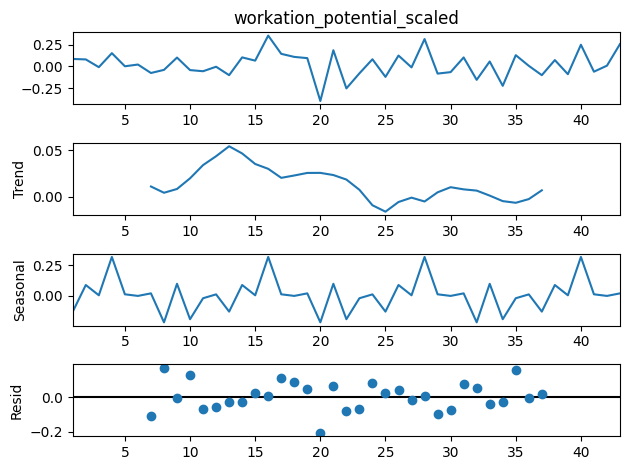

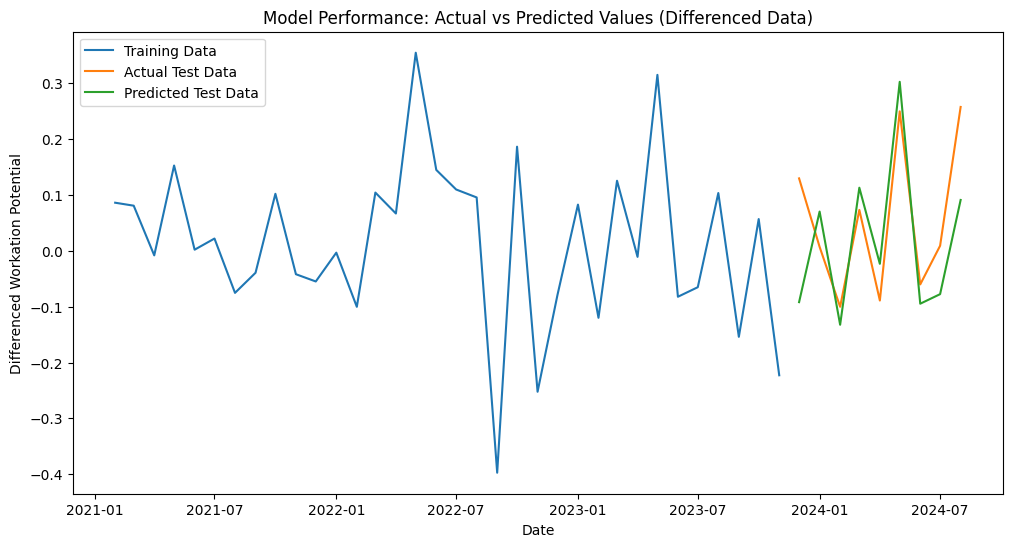


성능 평가 지표 (원래 스케일):
RMSE: 0.1738
MAE: 0.1532
MAPE: 18.63%


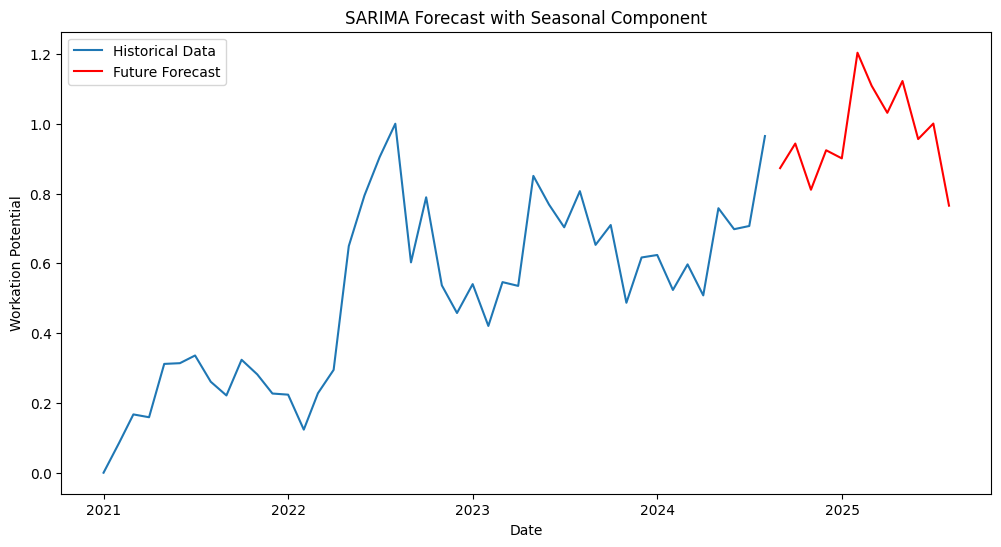


그래프 해석:
1. 전반적인 추세: 워케이션 잠재력은 decreasing 추세를 보입니다.
2. 계절성: 데이터에서 계절성은 present합니다.
3. 변동성: 예측된 future 기간의 변동성은 과거 데이터에 비해 lower합니다.
4. 최고점: 1.2034로 예상되며, 이는 2025-01-31에 발생할 것으로 예측됩니다.
5. 최저점: 0.7652로 예상되며, 이는 2025-07-31에 발생할 것으로 예측됩니다.
6. 권장사항: 워케이션 프로그램 및 마케팅 전략을 최고점 시기에 맞춰 집중적으로 진행하는 것이 효과적일 수 있습니다.


In [26]:
import pandas as pd
import numpy as np
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from itertools import product
import warnings
warnings.filterwarnings('ignore')
from sklearn.metrics import mean_squared_error, mean_absolute_error

# CSV 파일 읽기
df = pd.read_csv('영도구_시계열데이터.csv', encoding='cp949')

# 가중치 설정
weights = {
    '장기숙박비율': 0.90, 
    '관광소비액(천원)': 0.90,     
    '배우자': 0.80,      
    '부모님': 0.80,      
    '자녀': 0.80,         
    '역사관광': 0.70,   
    '문화관광': 0.70        
}

# 워케이션 잠재력 계산
df['workation_potential'] = (
    df['문화관광'] * weights['문화관광'] +
    df['역사관광'] * weights['역사관광'] +
    df['관광소비액(천원)'] * weights['관광소비액(천원)'] +
    df['장기숙박비율'] * weights['장기숙박비율']
) * (
    (df['배우자'] * weights['배우자'] +
     df['자녀'] * weights['자녀'] +
     df['부모님'] * weights['부모님']) / 3
)

# 워케이션 잠재력 스케일링
scaler = MinMaxScaler()
df['workation_potential_scaled'] = scaler.fit_transform(df[['workation_potential']])

# 시계열 데이터 준비
df['date'] = pd.to_datetime(df['기준년월'])
df = df.sort_values('date')
time_series = df['workation_potential_scaled']

# 정상성 검정
adf_result = adfuller(time_series)
print('ADF Statistic:', adf_result[0])
print('p-value:', adf_result[1])
print('Critical values:', adf_result[4])

# 첫 번째 차분
time_series_diff = time_series.diff().dropna()

# 첫 번째 차분 후 ADF 검정
adf_result_diff = adfuller(time_series_diff)
print('ADF Statistic after differencing:', adf_result_diff[0])
print('p-value after differencing:', adf_result_diff[1])

# 차분된 데이터에 맞춰 날짜 조정
dates_diff = df['date'][1:]  # 차분으로 인해 첫 번째 데이터 포인트 제거

# 시계열 분해
decomp = seasonal_decompose(time_series_diff, model='additive', period=12)
decomp.plot()
plt.show()

# 데이터를 훈련 세트와 테스트 세트로 분할
train_size = int(len(time_series_diff) * 0.8)
train_data = time_series_diff[:train_size]
test_data = time_series_diff[train_size:]

# SARIMAX 모델 설정 및 훈련
seasonal_order = (0, 1, 0, 12)
sarima_model = SARIMAX(train_data, order=(0, 1, 2), seasonal_order=seasonal_order)
fitted_sarima_model = sarima_model.fit()

# 테스트 세트에 대한 예측
test_forecast = fitted_sarima_model.forecast(steps=len(test_data))

# 실제값과 예측값 비교 시각화 (차분된 데이터)
plt.figure(figsize=(12, 6))

# 훈련 데이터
plt.plot(dates_diff[:train_size], train_data, label='Training Data')

# 실제 테스트 데이터
plt.plot(dates_diff[train_size:], test_data, label='Actual Test Data')

# 예측된 테스트 데이터
plt.plot(dates_diff[train_size:], test_forecast, label='Predicted Test Data')

plt.title('Model Performance: Actual vs Predicted Values (Differenced Data)')
plt.xlabel('Date')
plt.ylabel('Differenced Workation Potential')
plt.legend()
plt.show()

# 차분된 데이터에서 원래 데이터로 복원하는 함수 정의
def invert_difference(original_series, diff_series):
    last_value = original_series.iloc[-1]
    inverted_series = diff_series.cumsum() + last_value
    return inverted_series

# 테스트 데이터와 예측값을 원래 스케일로 복원
test_data_original = invert_difference(time_series.iloc[:train_size], test_data)
test_forecast_original = invert_difference(time_series.iloc[:train_size], test_forecast)

# 성능 평가 지표 계산 (원래 스케일로 복원된 데이터 사용)
rmse = np.sqrt(mean_squared_error(test_data_original, test_forecast_original))
mae = mean_absolute_error(test_data_original, test_forecast_original)
mape = np.mean(np.abs((test_data_original - test_forecast_original) / test_data_original)) * 100

print('\n성능 평가 지표 (원래 스케일):')
print(f'RMSE: {rmse:.4f}')
print(f'MAE: {mae:.4f}')
print(f'MAPE: {mape:.2f}%')

# 미래 예측
forecast_sarima = fitted_sarima_model.forecast(steps=12)  # 예측 기간 예시로 12개월 설정
forecast_sarima_original = invert_difference(time_series, forecast_sarima)

# 예측된 미래 날짜 계산
forecast_dates_sarima = pd.date_range(df['date'].iloc[-1] + pd.Timedelta(days=1), periods=12, freq='M')

# 미래 예측 시각화
plt.figure(figsize=(12, 6))

# 원본 시계열 데이터
plt.plot(df['date'], time_series, label='Historical Data')

# 예측된 미래 날짜 및 예측값
plt.plot(forecast_dates_sarima, forecast_sarima_original, label='Future Forecast', color='red')

# 그래프 제목 및 레이블
plt.title('SARIMA Forecast with Seasonal Component')
plt.xlabel('Date')
plt.ylabel('Workation Potential')

# 범례 추가
plt.legend()
plt.show()



# 그래프 해석 함수
def interpret_graph(historical_data, forecast_data, forecast_dates):
    if len(historical_data) == 0 or len(forecast_data) == 0:
        print("Error: Historical data or forecast data is empty.")
        return

    # 전반적인 추세 분석
    overall_trend = 'increasing' if forecast_data.iloc[-1] > historical_data.iloc[-1] else 'decreasing'
    
    # 계절성 확인
    seasonality = 'present' if seasonal_order[3] > 1 else 'not clearly present'
    
    # 예측의 변동성 분석
    forecast_volatility = forecast_data.std()
    historical_volatility = historical_data.iloc[-12:].std()  # 마지막 12개월의 변동성
    volatility_comparison = 'higher' if forecast_volatility > historical_volatility else 'lower'
    
    # 최고점과 최저점 찾기
    peak = forecast_data.max()
    trough = forecast_data.min()
    peak_date = forecast_dates[forecast_data.argmax()]
    trough_date = forecast_dates[forecast_data.argmin()]
    
    # 해석 출력
    print("\n그래프 해석:")
    print(f"1. 전반적인 추세: 워케이션 잠재력은 {overall_trend} 추세를 보입니다.")
    print(f"2. 계절성: 데이터에서 계절성은 {seasonality}합니다.")
    print(f"3. 변동성: 예측된 future 기간의 변동성은 과거 데이터에 비해 {volatility_comparison}합니다.")
    print(f"4. 최고점: {peak:.4f}로 예상되며, 이는 {peak_date.strftime('%Y-%m-%d')}에 발생할 것으로 예측됩니다.")
    print(f"5. 최저점: {trough:.4f}로 예상되며, 이는 {trough_date.strftime('%Y-%m-%d')}에 발생할 것으로 예측됩니다.")
    print("6. 권장사항: 워케이션 프로그램 및 마케팅 전략을 최고점 시기에 맞춰 집중적으로 진행하는 것이 효과적일 수 있습니다.")

# 그래프 해석 함수 호출
interpret_graph(time_series, forecast_sarima_original, forecast_dates_sarima)




### 추가성능지표

ADF Statistic: -1.2584059109932237
p-value: 0.6479804663727624
Critical values: {'1%': -3.6209175221605827, '5%': -2.9435394610388332, '10%': -2.6104002410518627}
ADF Statistic after differencing: -3.2114988351209814
p-value after differencing: 0.01932865544020926


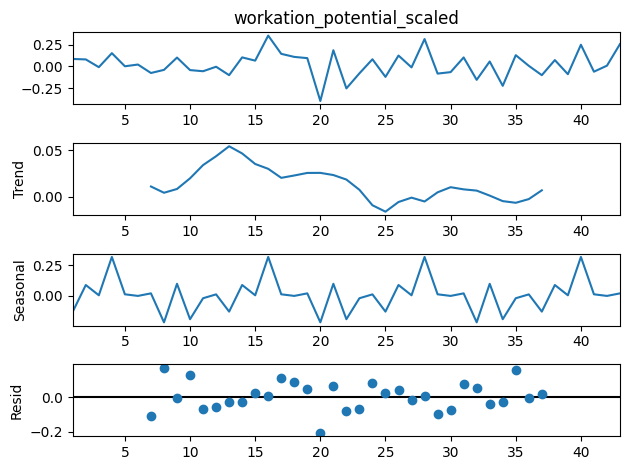

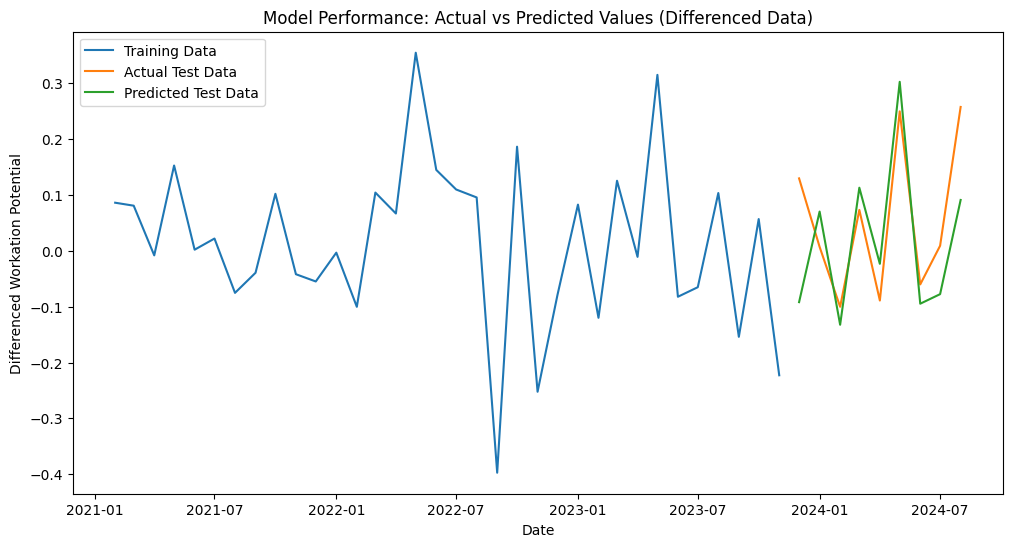


기본 성능 평가 지표 (원래 스케일):
RMSE: 0.1738
MAE: 0.1532
MAPE: 18.63%


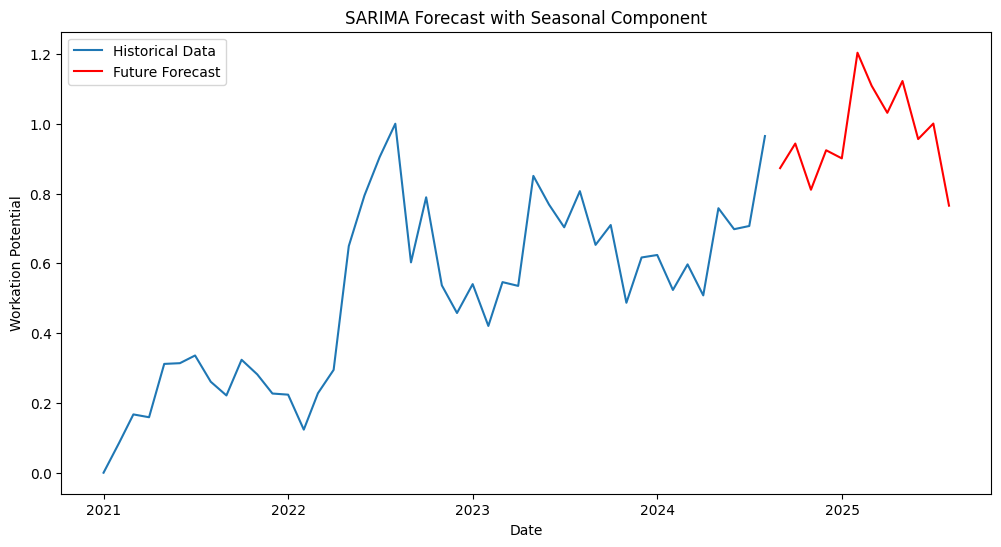


확장된 성능 평가 지표:
R-squared: -0.7594
Adjusted R-squared: -1.8151
Theil's U Statistic: 0.1056
Directional Accuracy: 87.50%

잔차 분석:
Jarque-Bera test p-value: nan
Ljung-Box test p-value: nan

예측 모델 성능 종합 평가:
1. 기본 오차 메트릭:
   - RMSE: 0.1738 (낮을수록 좋음)
   - MAE: 0.1532 (낮을수록 좋음)
   - MAPE: 18.63% (낮을수록 좋음)

2. 설명력 메트릭:
   - R-squared: -0.7594 (1에 가까울수록 좋음)
   - Adjusted R-squared: -1.8151 (1에 가까울수록 좋음)
   - Directional Accuracy: 87.50% (높을수록 좋음)

3. 예측 편향성:
   - Theil's U: 0.1056 (0에 가까울수록 좋음)

4. 잔차 분석:
   - 정규성 (Jarque-Bera test p-value): nan
   - 자기상관 (Ljung-Box test p-value): nan

5. 종합 평가:
   모델의 강점: 우수한 방향성 예측, 낮은 예측 편향

그래프 해석:
1. 전반적인 추세: 워케이션 잠재력은 decreasing 추세를 보입니다.
2. 계절성: 데이터에서 계절성은 present합니다.
3. 변동성: 예측된 future 기간의 변동성은 과거 데이터에 비해 lower합니다.
4. 최고점: 1.2034로 예상되며, 이는 2025-01-31에 발생할 것으로 예측됩니다.
5. 최저점: 0.7652로 예상되며, 이는 2025-07-31에 발생할 것으로 예측됩니다.
6. 권장사항: 워케이션 프로그램 및 마케팅 전략을 최고점 시기에 맞춰 집중적으로 진행하는 것이 효과적일 수 있습니다.


In [32]:
import pandas as pd
import numpy as np
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from itertools import product
import warnings
warnings.filterwarnings('ignore')
from sklearn.metrics import mean_squared_error, mean_absolute_error
import seaborn as sns
from sklearn.metrics import r2_score
import scipy.stats as stats
from statsmodels.stats.diagnostic import acorr_ljungbox
from statsmodels.graphics.tsaplots import plot_acf

# CSV 파일 읽기
df = pd.read_csv('영도구_시계열데이터.csv', encoding='cp949')

# 가중치 설정
weights = {
    '장기숙박비율': 0.90, 
    '관광소비액(천원)': 0.90,     
    '배우자': 0.80,      
    '부모님': 0.80,      
    '자녀': 0.80,         
    '역사관광': 0.70,   
    '문화관광': 0.70        
}

# 워케이션 잠재력 계산
df['workation_potential'] = (
    df['문화관광'] * weights['문화관광'] +
    df['역사관광'] * weights['역사관광'] +
    df['관광소비액(천원)'] * weights['관광소비액(천원)'] +
    df['장기숙박비율'] * weights['장기숙박비율']
) * (
    (df['배우자'] * weights['배우자'] +
     df['자녀'] * weights['자녀'] +
     df['부모님'] * weights['부모님']) / 3
)

# 워케이션 잠재력 스케일링
scaler = MinMaxScaler()
df['workation_potential_scaled'] = scaler.fit_transform(df[['workation_potential']])

# 시계열 데이터 준비
df['date'] = pd.to_datetime(df['기준년월'])
df = df.sort_values('date')
time_series = df['workation_potential_scaled']

# 정상성 검정
adf_result = adfuller(time_series)
print('ADF Statistic:', adf_result[0])
print('p-value:', adf_result[1])
print('Critical values:', adf_result[4])

# 첫 번째 차분
time_series_diff = time_series.diff().dropna()

# 첫 번째 차분 후 ADF 검정
adf_result_diff = adfuller(time_series_diff)
print('ADF Statistic after differencing:', adf_result_diff[0])
print('p-value after differencing:', adf_result_diff[1])

# 차분된 데이터에 맞춰 날짜 조정
dates_diff = df['date'][1:]  # 차분으로 인해 첫 번째 데이터 포인트 제거

# 시계열 분해
decomp = seasonal_decompose(time_series_diff, model='additive', period=12)
decomp.plot()
plt.show()

# 데이터를 훈련 세트와 테스트 세트로 분할
train_size = int(len(time_series_diff) * 0.8)
train_data = time_series_diff[:train_size]
test_data = time_series_diff[train_size:]

# SARIMAX 모델 설정 및 훈련
seasonal_order = (0, 1, 0, 12)
sarima_model = SARIMAX(train_data, order=(0, 1, 2), seasonal_order=seasonal_order)
fitted_sarima_model = sarima_model.fit()

# 테스트 세트에 대한 예측
test_forecast = fitted_sarima_model.forecast(steps=len(test_data))

# 실제값과 예측값 비교 시각화 (차분된 데이터)
plt.figure(figsize=(12, 6))
plt.plot(dates_diff[:train_size], train_data, label='Training Data')
plt.plot(dates_diff[train_size:], test_data, label='Actual Test Data')
plt.plot(dates_diff[train_size:], test_forecast, label='Predicted Test Data')
plt.title('Model Performance: Actual vs Predicted Values (Differenced Data)')
plt.xlabel('Date')
plt.ylabel('Differenced Workation Potential')
plt.legend()
plt.show()

# 차분된 데이터에서 원래 데이터로 복원하는 함수 정의
def invert_difference(original_series, diff_series):
    last_value = original_series.iloc[-1]
    inverted_series = diff_series.cumsum() + last_value
    return inverted_series

# 테스트 데이터와 예측값을 원래 스케일로 복원
test_data_original = invert_difference(time_series.iloc[:train_size], test_data)
test_forecast_original = invert_difference(time_series.iloc[:train_size], test_forecast)

# 기본 성능 평가 지표 계산
rmse = np.sqrt(mean_squared_error(test_data_original, test_forecast_original))
mae = mean_absolute_error(test_data_original, test_forecast_original)
mape = np.mean(np.abs((test_data_original - test_forecast_original) / test_data_original)) * 100

print('\n기본 성능 평가 지표 (원래 스케일):')
print(f'RMSE: {rmse:.4f}')
print(f'MAE: {mae:.4f}')
print(f'MAPE: {mape:.2f}%')

# 미래 예측
forecast_sarima = fitted_sarima_model.forecast(steps=12)  # 12개월 예측
forecast_sarima_original = invert_difference(time_series, forecast_sarima)

# 예측된 미래 날짜 계산
forecast_dates_sarima = pd.date_range(df['date'].iloc[-1] + pd.Timedelta(days=1), periods=12, freq='M')

# 미래 예측 시각화
plt.figure(figsize=(12, 6))
plt.plot(df['date'], time_series, label='Historical Data')
plt.plot(forecast_dates_sarima, forecast_sarima_original, label='Future Forecast', color='red')
plt.title('SARIMA Forecast with Seasonal Component')
plt.xlabel('Date')
plt.ylabel('Workation Potential')
plt.legend()
plt.show()

# 추가적인 성능 메트릭 계산
# R-squared 계산
r2 = r2_score(test_data_original, test_forecast_original)

# Adjusted R-squared 계산
n = len(test_data_original)  # 샘플 수
p = 3  # 모델의 파라미터 수 (p,d,q)
adjusted_r2 = 1 - (1-r2)*(n-1)/(n-p-1)

# Theil's U 통계량 계산
def theil_u(y_true, y_pred):
    y_true = np.array(y_true)
    y_pred = np.array(y_pred)
    numerator = np.sqrt(np.mean((y_true - y_pred) ** 2))
    denominator = np.sqrt(np.mean(y_true ** 2)) + np.sqrt(np.mean(y_pred ** 2))
    return numerator / denominator

theil_u_stat = theil_u(test_data_original, test_forecast_original)

# 예측의 방향성 정확도 계산
def directional_accuracy(y_true, y_pred):
    y_true_direction = np.diff(y_true) > 0
    y_pred_direction = np.diff(y_pred) > 0
    return np.mean(y_true_direction == y_pred_direction) * 100

da = directional_accuracy(test_data_original, test_forecast_original)

# 잔차 분석
residuals = test_data_original - test_forecast_original

# Jarque-Bera 테스트로 잔차의 정규성 검정
jb_stat, jb_pvalue = stats.jarque_bera(residuals)

# Ljung-Box 테스트로 잔차의 자기상관 검정 (수정된 버전)
def perform_ljung_box_test(residuals):
    try:
        max_lag = min(10, len(residuals) // 5)
        if max_lag < 1:
            return None, None
        lb_result = acorr_ljungbox(residuals, lags=max_lag, return_df=True)
        return lb_result['lb_stat'].iloc[-1], lb_result['lb_pvalue'].iloc[-1]
    except Exception as e:
        print(f"Ljung-Box 테스트 수행 중 오류 발생: {str(e)}")
        return None, None

lb_stat, lb_pvalue = perform_ljung_box_test(residuals)

# 확장된 결과 출력
print('\n확장된 성능 평가 지표:')
print(f'R-squared: {r2:.4f}')
print(f'Adjusted R-squared: {adjusted_r2:.4f}')
print(f"Theil's U Statistic: {theil_u_stat:.4f}")
print(f'Directional Accuracy: {da:.2f}%')

print('\n잔차 분석:')
print(f'Jarque-Bera test p-value: {jb_pvalue:.4f}')
if lb_pvalue is not None:
    print(f'Ljung-Box test p-value: {lb_pvalue:.4f}')
else:
    print('Ljung-Box test: 수행할 수 없음 (데이터 길이 부족)')

# 5. 종합 평가 보고서
print('\n예측 모델 성능 종합 평가:')
print('1. 기본 오차 메트릭:')
print(f'   - RMSE: {rmse:.4f} (낮을수록 좋음)')
print(f'   - MAE: {mae:.4f} (낮을수록 좋음)')
print(f'   - MAPE: {mape:.2f}% (낮을수록 좋음)')

print('\n2. 설명력 메트릭:')
print(f'   - R-squared: {r2:.4f} (1에 가까울수록 좋음)')
print(f'   - Adjusted R-squared: {adjusted_r2:.4f} (1에 가까울수록 좋음)')
print(f'   - Directional Accuracy: {da:.2f}% (높을수록 좋음)')

print('\n3. 예측 편향성:')
print(f"   - Theil's U: {theil_u_stat:.4f} (0에 가까울수록 좋음)")

print('\n4. 잔차 분석:')
print(f'   - 정규성 (Jarque-Bera test p-value): {jb_pvalue:.4f}')
if lb_pvalue is not None:
    print(f'   - 자기상관 (Ljung-Box test p-value): {lb_pvalue:.4f}')

print('\n5. 종합 평가:')
evaluation = []
if r2 > 0.7: evaluation.append("높은 설명력")
if da > 70: evaluation.append("우수한 방향성 예측")
if theil_u_stat < 0.3: evaluation.append("낮은 예측 편향")
if jb_pvalue > 0.05: evaluation.append("정규분포 가정 충족")
if lb_pvalue is not None and lb_pvalue > 0.05: evaluation.append("자기상관 없음")

print('   모델의 강점:', ', '.join(evaluation) if evaluation else "개선이 필요한 부분이 있습니다.")

# 그래프 해석 함수
def interpret_graph(historical_data, forecast_data, forecast_dates):
    if len(historical_data) == 0 or len(forecast_data) == 0:
        print("Error: Historical data or forecast data is empty.")
        return

    # 전반적인 추세 분석
    overall_trend = 'increasing' if forecast_data.iloc[-1] > historical_data.iloc[-1] else 'decreasing'
    
    # 계절성 확인
    seasonality = 'present' if seasonal_order[3] > 1 else 'not clearly present'
    
    # 예측의 변동성 분석
    forecast_volatility = forecast_data.std()
    historical_volatility = historical_data.iloc[-12:].std()  # 마지막 12개월의 변동성
    volatility_comparison = 'higher' if forecast_volatility > historical_volatility else 'lower'
    
    # 최고점과 최저점 찾기
    peak = forecast_data.max()
    trough = forecast_data.min()
    peak_date = forecast_dates[forecast_data.argmax()]
    trough_date = forecast_dates[forecast_data.argmin()]
    
    # 해석 출력
    print("\n그래프 해석:")
    print(f"1. 전반적인 추세: 워케이션 잠재력은 {overall_trend} 추세를 보입니다.")
    print(f"2. 계절성: 데이터에서 계절성은 {seasonality}합니다.")
    print(f"3. 변동성: 예측된 future 기간의 변동성은 과거 데이터에 비해 {volatility_comparison}합니다.")
    print(f"4. 최고점: {peak:.4f}로 예상되며, 이는 {peak_date.strftime('%Y-%m-%d')}에 발생할 것으로 예측됩니다.")
    print(f"5. 최저점: {trough:.4f}로 예상되며, 이는 {trough_date.strftime('%Y-%m-%d')}에 발생할 것으로 예측됩니다.")
    print("6. 권장사항: 워케이션 프로그램 및 마케팅 전략을 최고점 시기에 맞춰 집중적으로 진행하는 것이 효과적일 수 있습니다.")

# 그래프 해석 함수 호출
interpret_graph(time_series, forecast_sarima_original, forecast_dates_sarima)


- 모델은 정확한 값의 예측에는 어려움을 겪고 있지만, 트렌드의 방향성은 잘 포착하고 있다.